### Cramer's V - with Chi-Squared Value

Cramer's V is using for categorical-categorical correlation/stregth, Chi-Squared's result shows us the significance of two variables but Cramer's V shows us the strength of this significance, so two variables can have a relation but to see how strength this relationship is we need V.


Also we can say that, Cramer's V is kinda pearson correlation that we generally use in numerical (continous values) correlation 

> df.corr()

    chi squared is direction - significance
    cramer's v test is correlation  - strength 
   

## Content


    - General EDA - Data wrangling
    - Understanding PANDAS CROSSTABS
    - CHI-SQUARED with CROSSTABS
    - CRAMERS V WITH CHI-SQUARED Value
    - Visualizations for better understaning
    - Cramer's V vs Random Forest Feature Importance Comparison

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency # for chi-squared and V value
import warnings
warnings.filterwarnings("ignore")

# plot customization
background_color = "#f3f2ed"
custom_cmap = ["#DFD8CA" for _ in range(7)]
custom_cmap[0] = "#B91646"
sns.set_palette(sns.color_palette(custom_cmap))

### Data Loading - Pre-processing - EDA

**___Note:___ Since we are focusing on the categorical values we won't do any detailed EDA on numerical ones**

In [2]:
master_df = pd.read_csv("datasets/adult_data.csv")
df = master_df.copy()
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# it is a little bit imbalanced but that's OK because we are looking for correlations 
df.salary.nunique(), df.salary.value_counts(normalize=True)

(2,
 <=50K    0.75919
 >50K     0.24081
 Name: salary, dtype: float64)

In [5]:
# checking null values
# seems like we don't have any null values but in categorical columns we might have value like '?' or something relevant to this 
# in order to make sure, we will check this later on...
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

As we can see down below, we have '?' values in our cat columns
We'll figure this out

Features to check:
    - workclass
    - occupation
    - native-country

In [6]:
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}\n {df[col].unique()}")

workclass
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship
 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race
 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex
 ['Male' 'Female']
native-country
 ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' '

In [7]:
round((df.isin(['?']).sum()) / df.shape[0] * 100, 2)

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education-num     0.00
marital-status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital-gain      0.00
capital-loss      0.00
hours-per-week    0.00
native-country    1.79
salary            0.00
dtype: float64

The percentage is not that much high so we can drop these rows

Again, we are focusing on statistical understanding

WE are not going to dive into details about missing values or ML

In [8]:
df = df[~df.isin(['?'])] # get rid of 
df = df.dropna(how="any")
for col in df.select_dtypes(include=["object"]).columns:
    print(f"{col}\n {df[col].unique()}")

workclass
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
education
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
marital-status
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
relationship
 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race
 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex
 ['Male' 'Female']
native-country
 ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippin

Before we apply statistical approaches to our categorical values it is better to see how easy to get an idea on numerical  values' correlation

In [9]:
corr = df[df.select_dtypes(include=["float64", "int64"]).columns].corr() # for all numeric values
corr.style.bar(color="Orange")

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours-per-week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


Now we are checking uniqueness of the categorical features

If a feature has more than 20 unique values, I am going to drop it

I want to visualize these features so that it will be much clear with features which have less unique values than 20

In [10]:
df.select_dtypes(include=["object"]).nunique()

workclass          7
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
salary             2
dtype: int64

In [11]:
# we will take all categorical values for functional programming 
# but first we need to drop one which is "native-country"
df.drop(columns=["native-country"],inplace=True)

In [12]:
# Chosen feaeture
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
categorical_cols.pop()
categorical_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [13]:
df.salary.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: salary, dtype: object

### Pandas CrossTabs

**___Definition:___** Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed. [documentation](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)

In [14]:
# 2 values crosstab
pd.crosstab(index=df["marital-status"] , columns=df["salary"])

salary,<=50K,>50K
marital-status,,
Divorced,3762,452
Married-AF-spouse,11,10
Married-civ-spouse,7666,6399
Married-spouse-absent,339,31
Never-married,9256,470
Separated,873,66
Widowed,747,80


In [15]:
# with total column
pd.crosstab(index=df["marital-status"] , columns=df["salary"], margins=True) 

salary,<=50K,>50K,All
marital-status,,,
Divorced,3762,452,4214
Married-AF-spouse,11,10,21
Married-civ-spouse,7666,6399,14065
Married-spouse-absent,339,31,370
Never-married,9256,470,9726
Separated,873,66,939
Widowed,747,80,827
All,22654,7508,30162


In [16]:
# multiple features crossed
pd.crosstab(index=[df["occupation"], df["sex"]] , columns=df["salary"])

salary                    <=50K  >50K
occupation        sex                
Adm-clerical      Female   2303   209
                  Male      920   289
Armed-Forces      Male        8     1
Craft-repair      Female    197    19
                  Male     2925   889
Exec-managerial   Female    866   277
                  Male     1189  1660
Farming-fishing   Female     63     2
                  Male      811   113
Handlers-cleaners Female    160     4
                  Male     1107    79
Machine-op-inspct Female    523    20
                  Male     1198   225
Other-service     Female   1709    49
                  Male     1371    83
Priv-house-serv   Female    134     1
                  Male        8     0
Prof-specialty    Female   1111   380
                  Male     1116  1431
Protective-serv   Female     66    10
                  Male      368   200
Sales             Female   1160    88
                  Male     1454   882
Tech-support      Female    297    44
                  Male      337   234
Transport-moving  Female     81     9
                  Male     1172   310

Chi-Squared will use crosstab values and frequencies of each categorical value with the specified target column whic is **salary** in that case.

How chi-squared is calculated:

![chi-formula](images/chi-squared-formula.jpg)


For more understanding check this out ->  [What is the Chi-Square Test and How Does it Work?](https://www.analyticsvidhya.com/blog/2019/11/what-is-chi-square-test-how-it-works/)

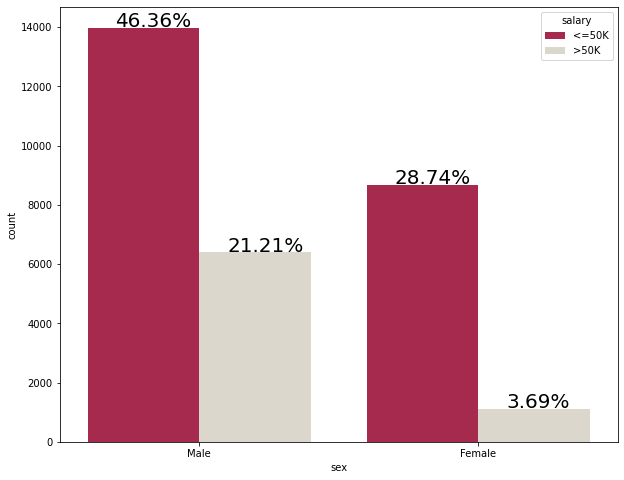

In [17]:
# Before we try Chi-Squared - it is better to see and catch some correlation/frequency between two categorical values
fig, axes = plt.subplots(figsize=(10,8))
def visualize(feature, target_feature):
    ax = sns.countplot(x=feature, hue=target_feature, data=df)
    for patch in ax.patches:
        ax.text(patch.get_x() + .1, patch.get_height() + 30, f"{round((patch.get_height() / df.shape[0] * 100), 2)}%", size=20)
visualize("sex","salary")

In [18]:
# with crosstab
ct = pd.crosstab(index=df["sex"], columns=df["salary"])
ct

salary,<=50K,>50K
sex,,
Female,8670,1112
Male,13984,6396


In [19]:
#we need crosstab values so that we get the each rows values with indexing 
print(ct.iloc[0]) # Female 
print(ct.iloc[1]) # Male

salary
<=50K    8670
>50K     1112
Name: Female, dtype: int64
salary
<=50K    13984
>50K      6396
Name: Male, dtype: int64


Chi-Squared Value :  1415.2864042410245
p - Value :  1.00155254124934e-309
Degrees of Freedom Value :  1


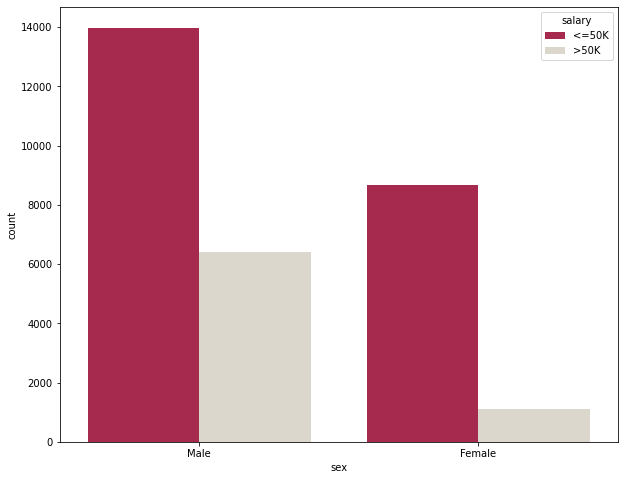

In [20]:
fig, axes = plt.subplots(figsize=(10,8))
def visualize_chi_squared(crosstab):
    (chi, p, dof,_) = chi2_contingency(ct)
    print("Chi-Squared Value : " , chi)
    print("p - Value : " , p)
    print("Degrees of Freedom Value : " , dof)

    # visualization code
    sns.countplot(x=df[crosstab.index.name], hue=df[crosstab.columns.name])
    plt.savefig("figures/crosstab_visualization_sample.png", dpi=fig.dpi)
    plt.show()
visualize_chi_squared(ct)


## Cramer's V Test 

Here a [clear explanation](https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=terms-cramrs-v) of Cramer's V and Chi squared 

We use Chi-Squared value to get Cramer's V value

We can see the correlatin/association between two variables

There is a measure for output values called ''Effect Size''

    ES ≤ 0.2 	         The result is weak. Although the result is statistically significant, the fields are only weakly associated.
    0.2 < ES ≤ 0.6 	   The result is moderate. The fields are moderately associated.
    ES > 0.6 	         The result is strong. The fields are strongly associated.
   
   [From the source - IBM](https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=terms-cramrs-v)

In [21]:
(chi, p, dof,_) = chi2_contingency(ct)
crm_v = np.sqrt(chi / df.shape[0] * ( min(ct.shape) - 1)) # for the entire column values
print(crm_v)

0.216616781879119


### Now, it's time to visualize and combine all we discussed above

This one is a little bit complex visualization code but no worry this is not our focused anyway.

    - p value of chi-squared show that there is some significance between features in that direction
    - v value of cramer's V shows that the strength of the significance between features

In [22]:
cramer_v_values = dict()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


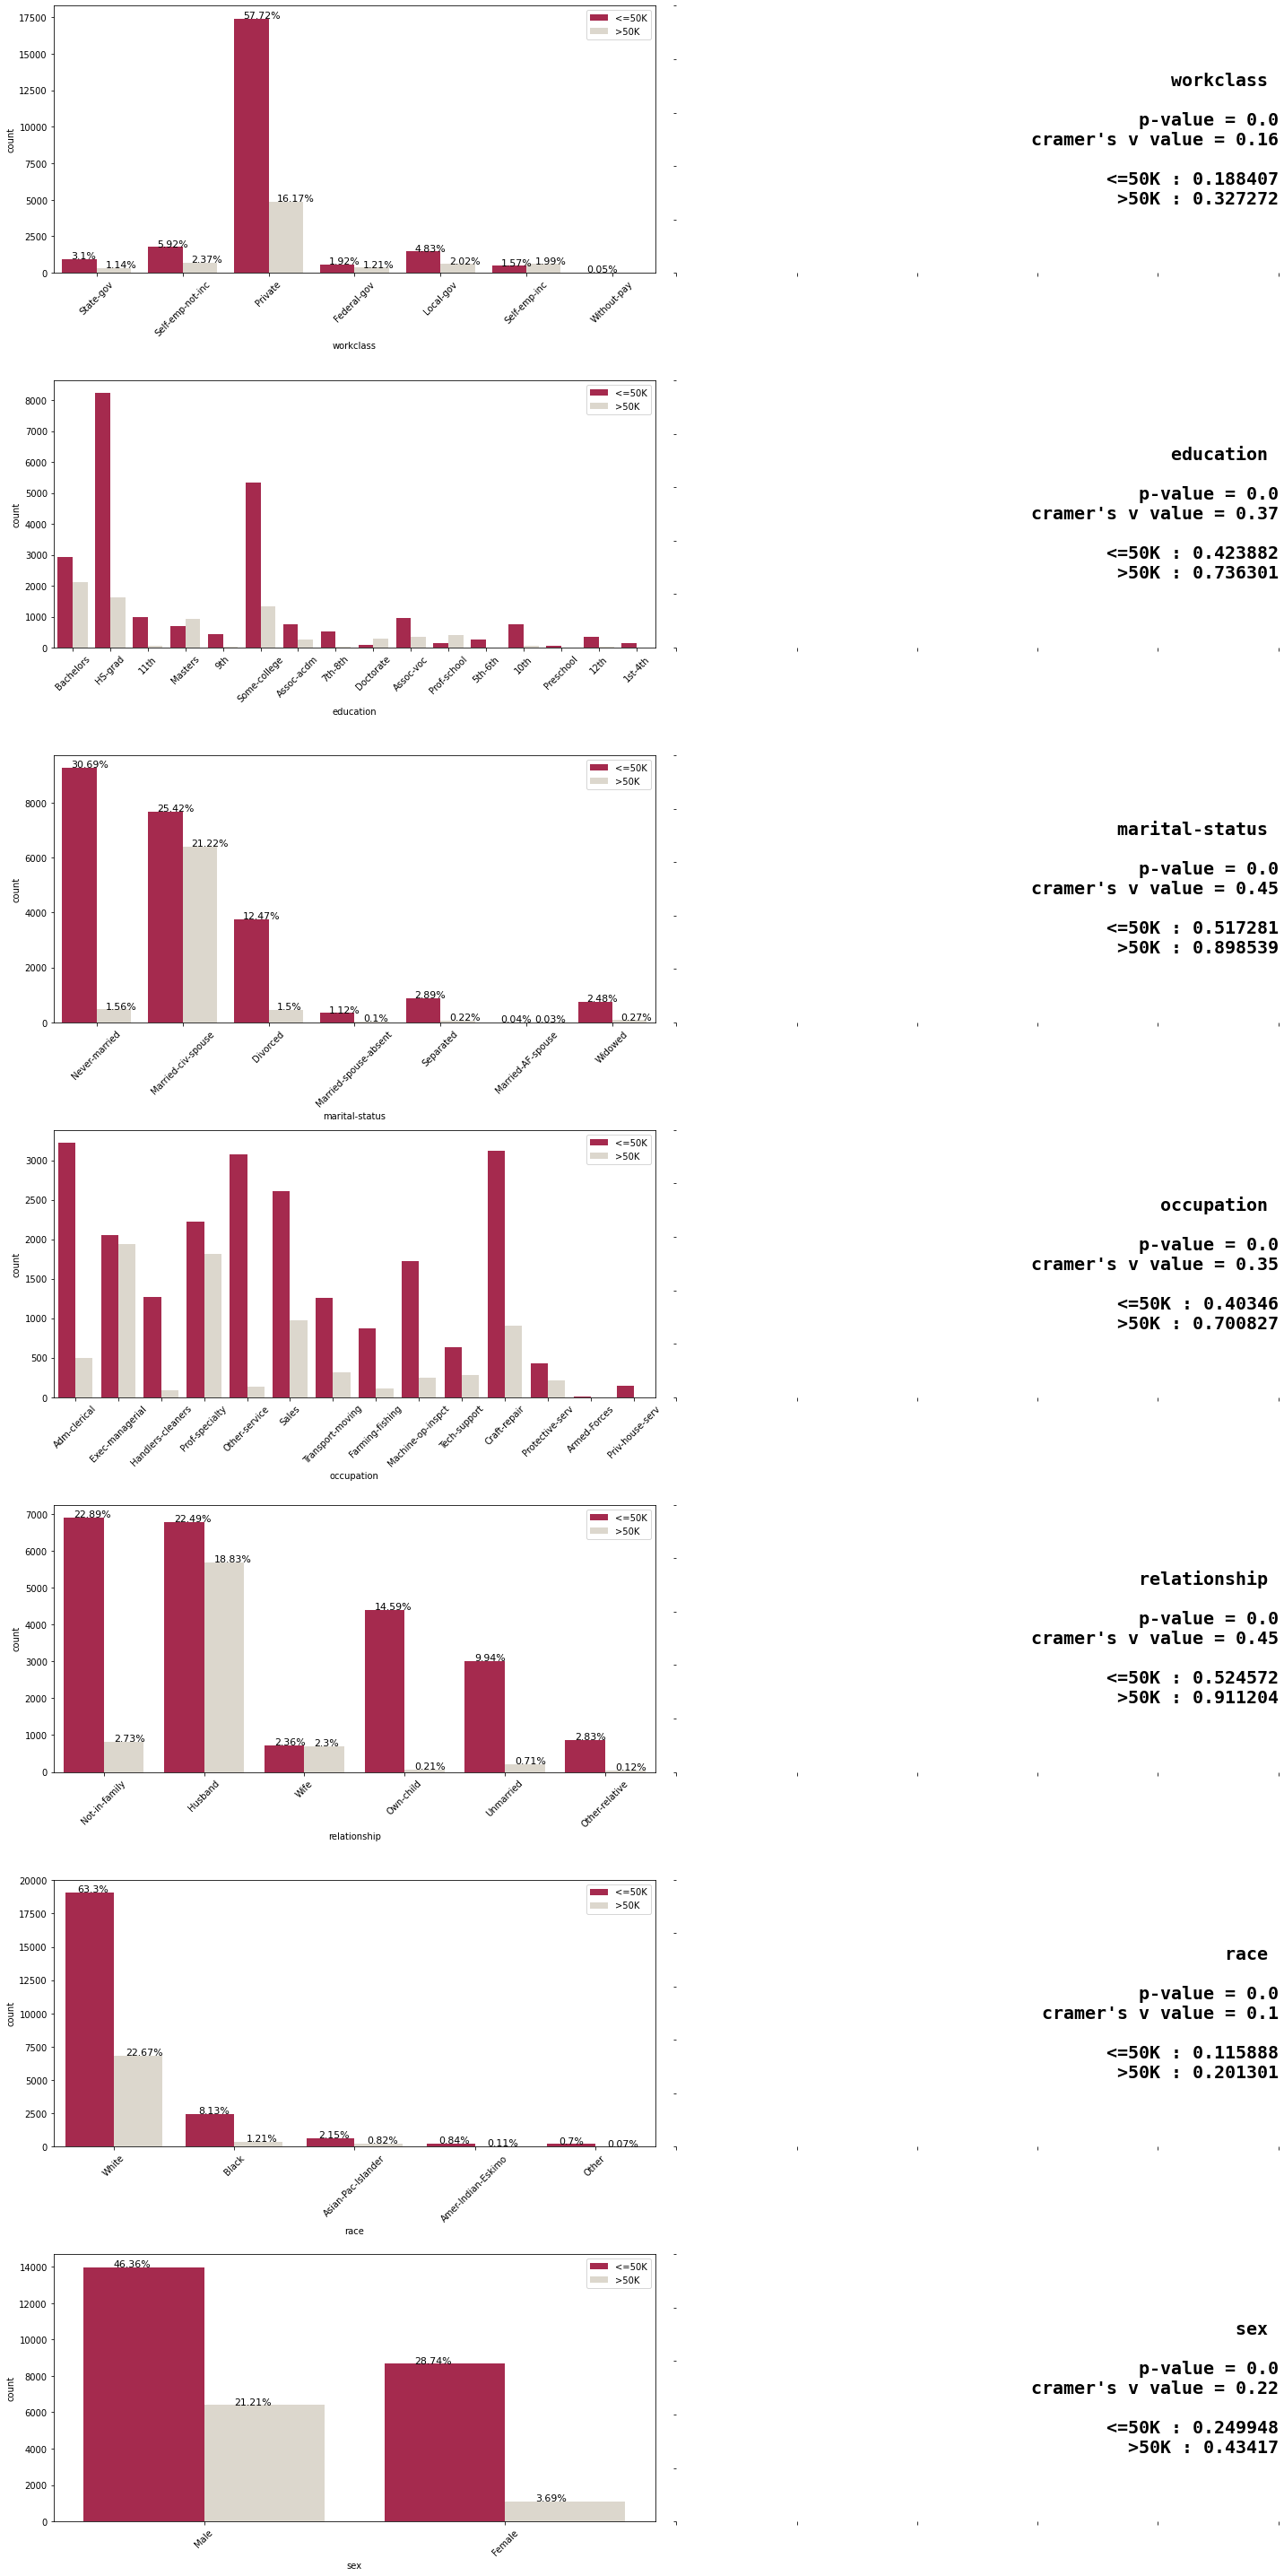

In [23]:
fig, axes = plt.subplots(len(categorical_cols), 2, figsize=(20, 40), facecolor="white")

for ax, column in enumerate(categorical_cols): # loop for each categorical value
    ct = pd.crosstab(index=df[column], columns=df["salary"]) # cross tab between salary and other categorical values
    ct_values = []
    # get each value of crosstab individualy
    for col in range(max(ct.shape)):
        ct_values.append(ct.iloc[col].values)
    (chi, p, dof,_) = chi2_contingency(ct_values) # get chi-square parameters' ouputs
    crm_v = np.sqrt(chi / df.shape[0] * ( min(ct.shape) - 1)) # get the cramer's V value - entire column
    cramer_v_values[column] = crm_v # save the value for later on comparison with the random forest feature importance results
    unique_v_values = np.sqrt(chi / ct.sum() * ( min(ct.shape) - 1)) # correlation for each unique value in target feature
    sns.countplot(x=df[column], hue=df["salary"], ax=axes[ax][0]) # graph visualization and axes specifying
    # I want to kepp the graphs clear as much as possible , no need for chaos --- keep it simple
    if df[column].nunique() <= 7:
        for patch in axes[ax][0].patches:
            axes[ax][0].text(patch.get_x() + .1, patch.get_height() + 20, f"{round((patch.get_height() / df.shape[0] * 100), 2)}%", size=11)

    # better visualizations
    axes[ax][0].legend(loc="upper right")
    axes[ax][0].tick_params(axis='x', rotation=45)
    sns.histplot(ax=axes[ax][1])
    axes[ax][1].set(xticklabels=[])
    axes[ax][1].set(yticklabels=[])
    axes[ax][1].grid(False)
    
    for edge in ["left", "right", "bottom", "top"]:
        axes[ax][1].spines[edge].set_visible(False)
    # text we put on the right side of each row, there might be better and easy ways to do that but I prefered this one and learned A LOT    
    axes[ax][1].text(axes[ax][1].get_xlim()[1], axes[ax][1].get_ylim()[1] / 2,
                     f"{column} \n\np-value = {round(float(p),2)}\ncramer's v value = {round(float(crm_v),2)}\n \
                     \n{list(unique_v_values.keys())[0]} : {round(unique_v_values.values[0], 6)}\n \
                     {list(unique_v_values.keys())[1]} : {round(unique_v_values.values[1], 6)}",
                     fontsize=23,fontweight="bold",fontfamily='monospace',
                     ha="right", va="center", size=20)
plt.savefig("figures/complete_categorical_plots_with_stats.png", dpi=fig.dpi)
plt.tight_layout()
plt.show()

## ML Integration - Random Forest Feature Importance Parameter vs Cramer's V Test Values

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [25]:
df.select_dtypes(include=["float64", "int64"]).columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [26]:
df.select_dtypes(include=["object"]).columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'salary'],
      dtype='object')

In [27]:
cramer_df = pd.DataFrame(list(cramer_v_values.values()), list(cramer_v_values.keys()), columns=["value"])
cramer_df

,value
workclass,0.163283
education,0.367356
marital-status,0.448300
occupation,0.349658
relationship,0.454619
race,0.100434
sex,0.216617


In [28]:
lbl_enc = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = lbl_enc.fit_transform(df[col])

In [29]:
%%time
forest = RandomForestClassifier(n_estimators=1000, max_features=7, random_state=0)
df_train = df.drop(columns=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss','hours-per-week', 'salary'], axis=1)
forest.fit(df_train, df["salary"])
feature_scores = pd.Series(forest.feature_importances_, index=df_train.columns).sort_values(ascending=True)
print(list(feature_scores.index))

['sex', 'marital-status', 'race', 'workclass', 'occupation', 'education', 'relationship']
CPU times: user 24.6 s, sys: 415 ms, total: 25 s
Wall time: 26.1 s


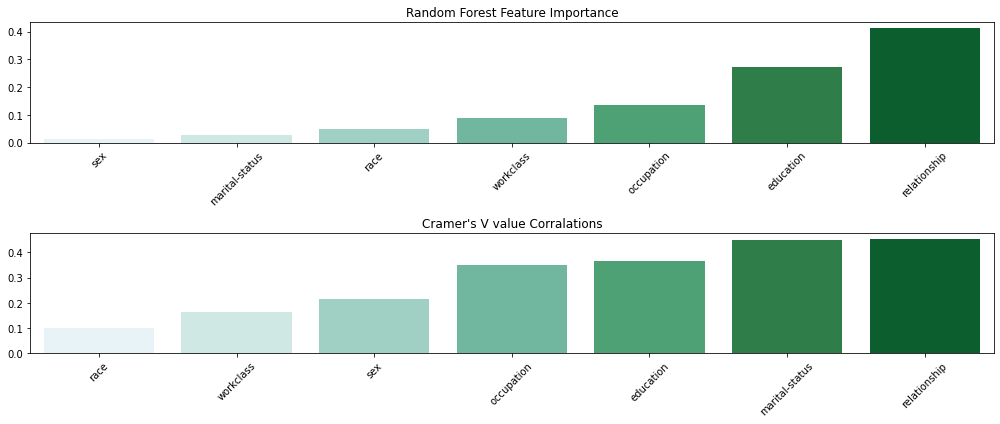

In [30]:
fig, ax = plt.subplots(2,1, figsize=(14,6))

sns.barplot(list(feature_scores.index), feature_scores, ax=ax[0], palette="BuGn")
ax[0].tick_params(axis="x",rotation=45)
ax[0].set_title("Random Forest Feature Importance")
sns.barplot(list(cramer_df.sort_values(by="value").loc[:].index), list(cramer_df.sort_values(by="value").loc[:].value), ax=ax[1], palette="BuGn")
ax[1].tick_params(axis="x",rotation=45)
ax[1].set_title("Cramer's V value Corralations")

plt.savefig("figures/cramer_v_vs_random_forest_feature_importance.png", dpi=fig.dpi)
plt.tight_layout()
plt.show()

[Dataset](https://www.kaggle.com/uciml/adult-census-income)

___Final Assessments___
    
    - understanding Chi-Squared and Chi-Squared's p Value
    - understanding Cramer's V test and usage with Chi-Squared Value
    - Visualization and other outputs comparison
    - RandomForestClassifier 'feature_importance' parameter vs cramer_v value comparison (results are pretty much similar )


**___EnesCavus Chi-Squared & Cramer' V Test with AdultIncome Dataset___**